# <font style="color:rgb(50,120,229)">Human Pose Estimation : OpenPose </font>


In [19]:
import numpy as np
import cv2,os
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
from dataPath import MODEL_PATH
%matplotlib inline

In [20]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## <font style="color:rgb(50,120,229)">Load a Caffe Model</font>
A typical Caffe Model has two files

1. **Architecture** : Defined in a **.prototxt** file 
2. **Weights** : Defined in **.caffemodel** file

In [21]:
protoFile = MODEL_PATH +"mpi.prototxt"
weightsFile = MODEL_PATH +"pose_iter_160000.caffemodel"

In [22]:
nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

## <font style="color:rgb(50,120,229)">Read Image</font>

In [13]:
im = cv2.imread(DATA_PATH + "images/man.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
inWidth = im.shape[1]
inHeight = im.shape[0]

## <font style="color:rgb(50,120,229)">Convert image to blob</font>

In [14]:
netInputSize = (368, 368)
inpBlob = cv2.dnn.blobFromImage(im, 1.0 / 255, netInputSize, (0, 0, 0), swapRB=True, crop=False)
net.setInput(inpBlob)

## <font style="color:rgb(50,120,229)">Run Inference (forward pass)</font>

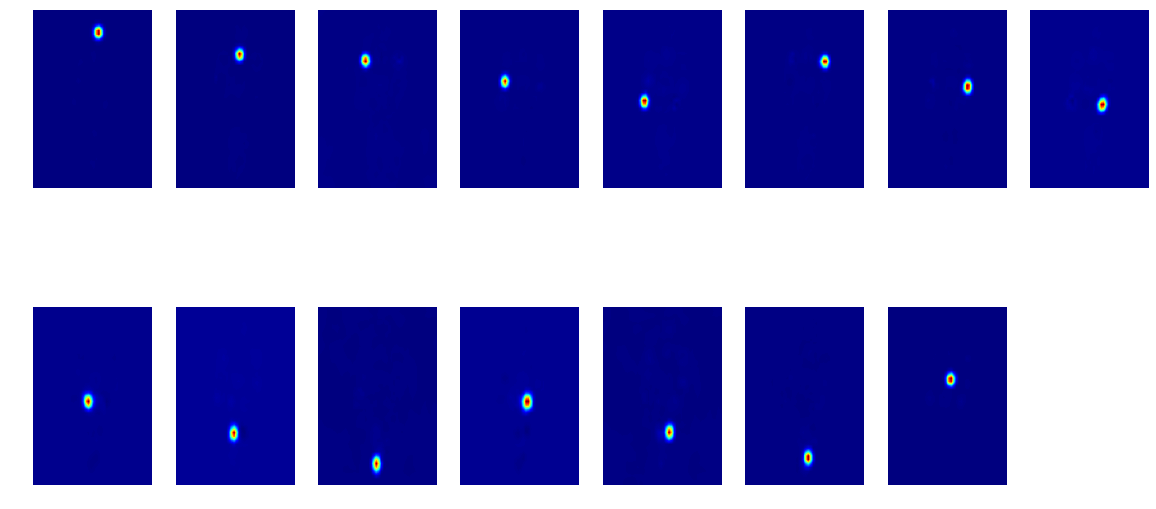

In [15]:
# Forward Pass
output = net.forward()

# Display probability maps
plt.figure(figsize=(20,10))
for i in range(nPoints):
    probMap = output[0, i, :, :]
    displayMap = cv2.resize(probMap, (inWidth, inHeight), cv2.INTER_LINEAR)
    plt.subplot(2, 8, i+1); plt.axis('off'); plt.imshow(displayMap, cmap='jet')

## <font style="color:rgb(50,120,229)">Extract points</font>

In [16]:
# X and Y Scale
scaleX = inWidth / output.shape[3]
scaleY = inHeight / output.shape[2]

# Empty list to store the detected keypoints
points = []

# Treshold 
threshold = 0.1

for i in range(nPoints):
    # Obtain probability map
    probMap = output[0, i, :, :]
    
    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = scaleX * point[0]
    y = scaleY * point[1]

    if prob > threshold : 
        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)


## <font style="color:rgb(50,120,229)">Display Points & Skeleton</font>

In [17]:
imPoints = im.copy()
imSkeleton = im.copy()
# Draw points
for i, p in enumerate(points):
    cv2.circle(imPoints, p, 8, (255, 255,0), thickness=-1, lineType=cv2.FILLED)
    cv2.putText(imPoints, "{}".format(i), p, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, lineType=cv2.LINE_AA)

# Draw skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(imSkeleton, points[partA], points[partB], (255, 255,0), 2)
        cv2.circle(imSkeleton, points[partA], 8, (255, 0, 0), thickness=-1, lineType=cv2.FILLED)



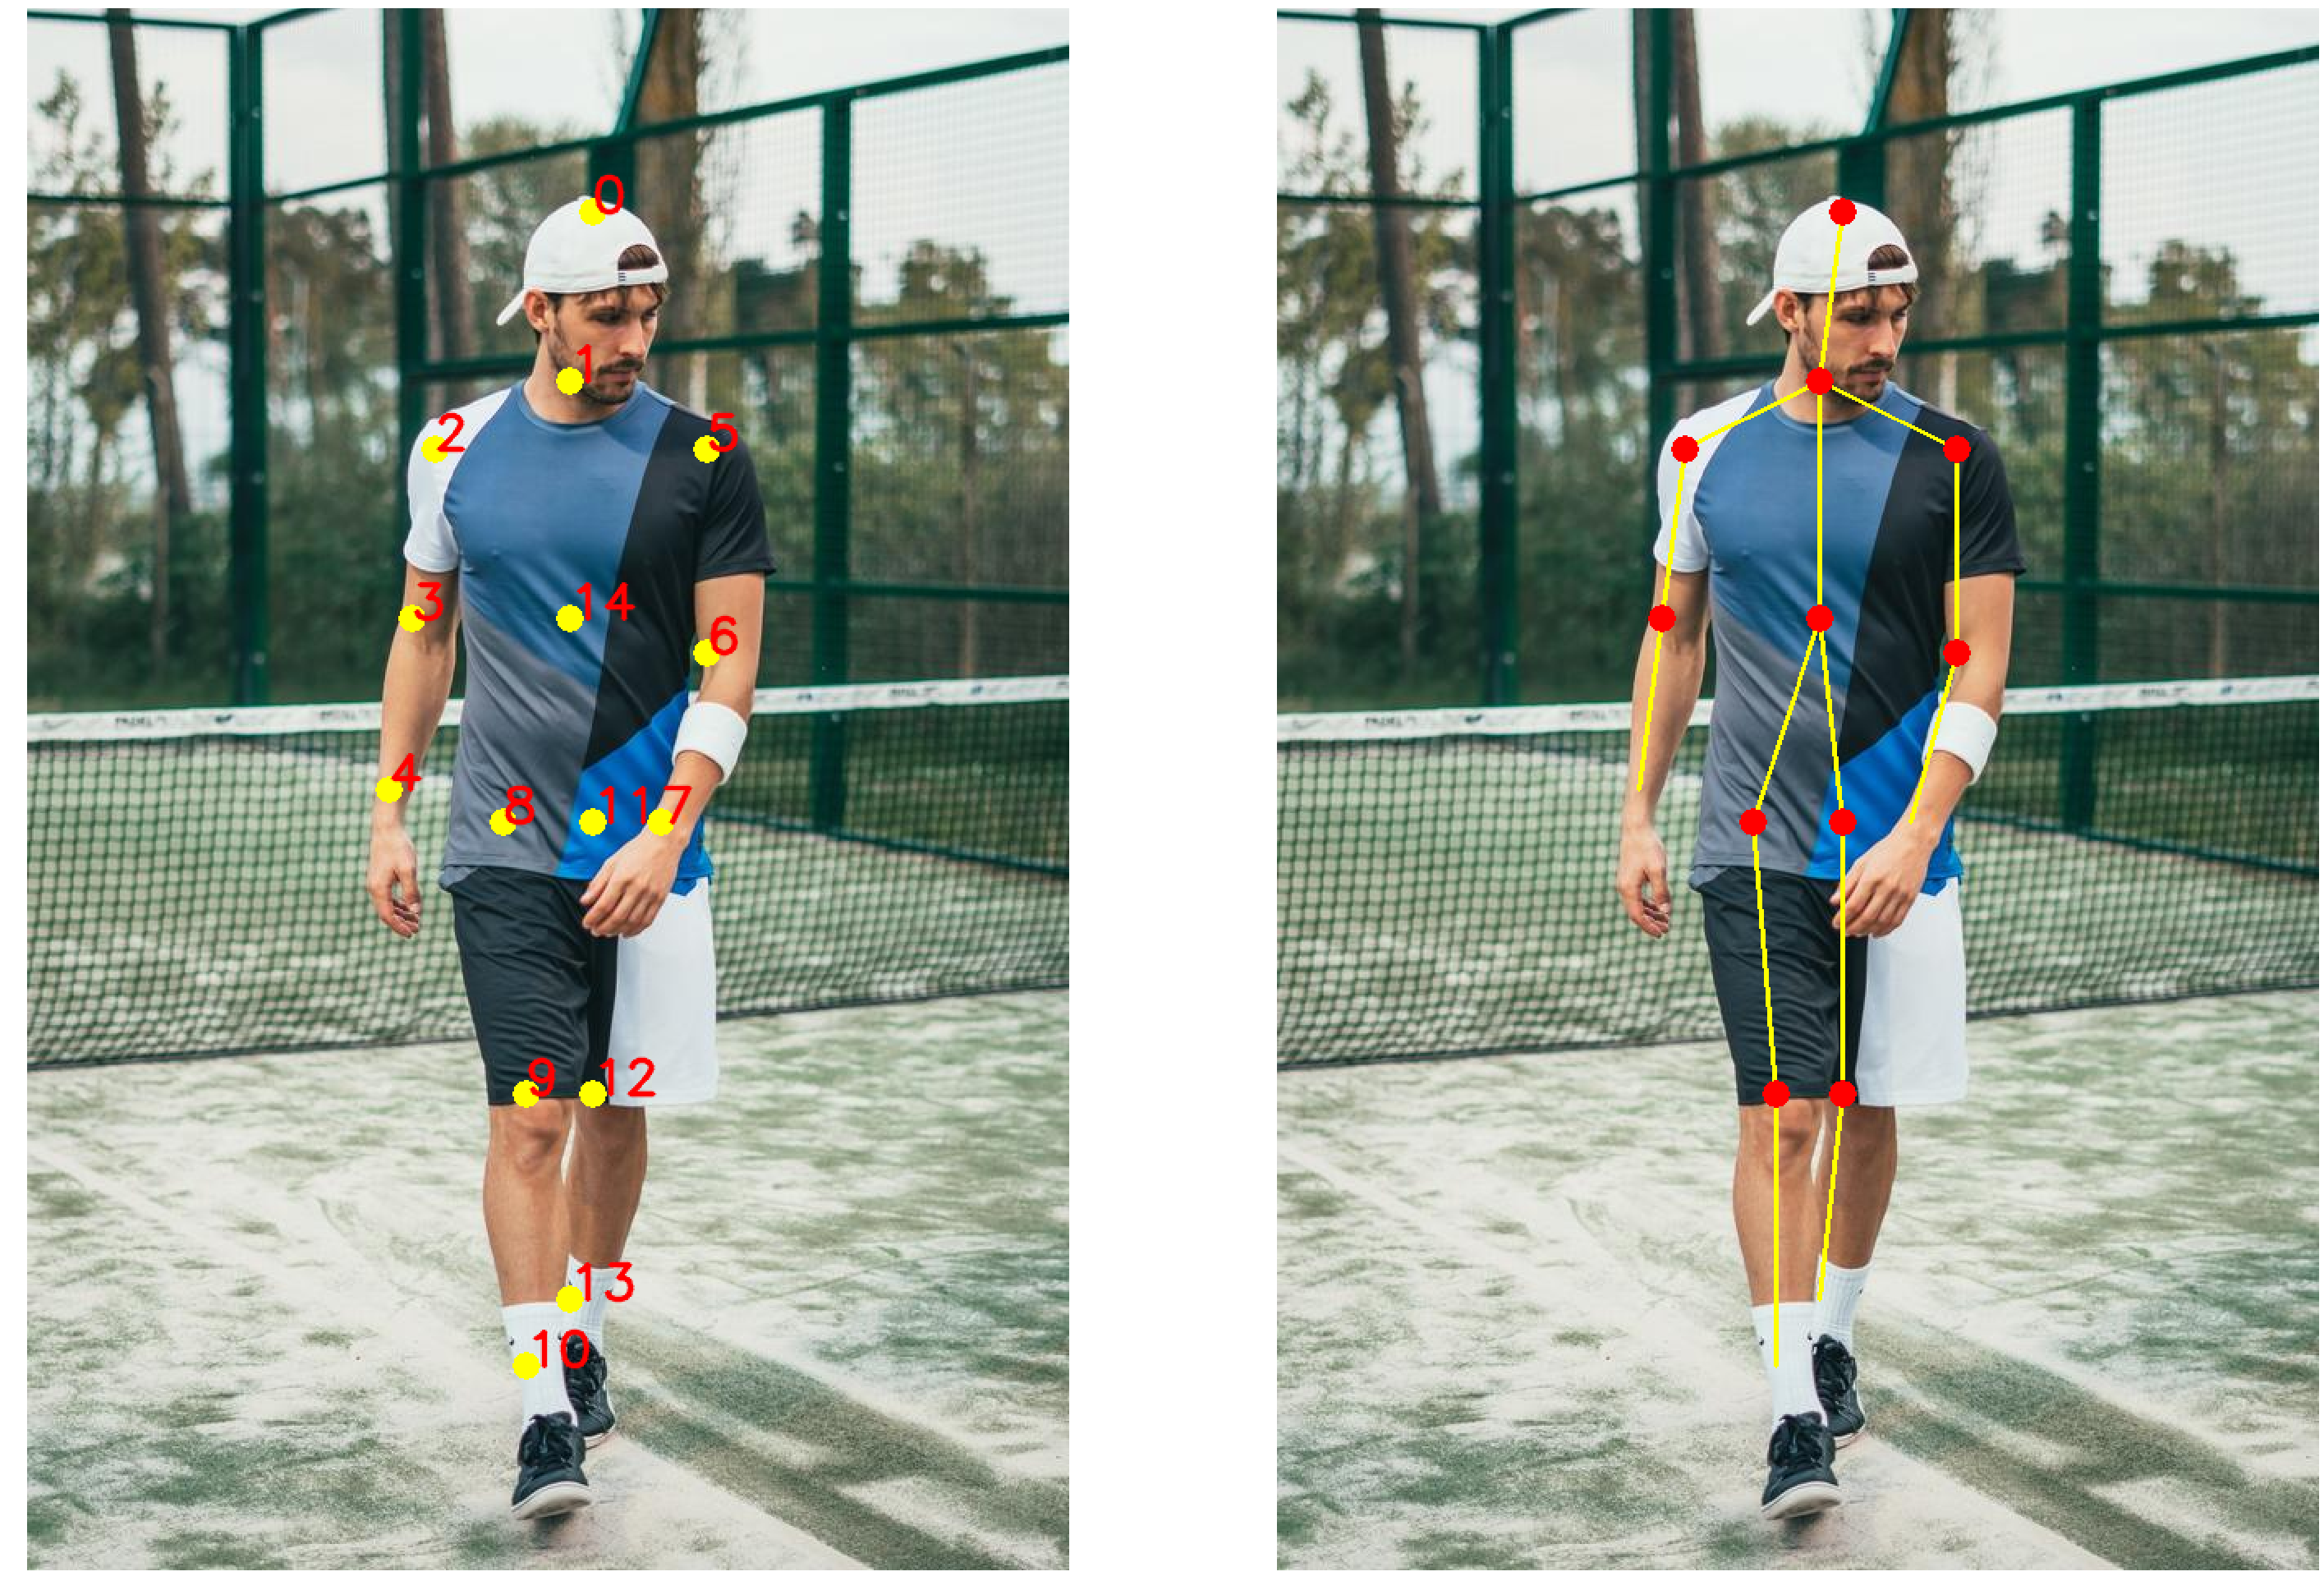

In [18]:
plt.figure(figsize=(50,50))
plt.subplot(121); plt.axis('off'); plt.imshow(imPoints);
plt.subplot(122); plt.axis('off'); plt.imshow(imSkeleton);